# Lead Scoring Case Study
## Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading CSV file

In [2]:
Lead_scoring_df = pd.read_csv("Leads.csv")
Lead_scoring_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
Lead_scoring_df.shape

(9240, 37)

In [4]:
Lead_scoring_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
Lead_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Cleaning

In [6]:
Lead_scoring_df_null_Percentage = ((Lead_scoring_df.isnull().sum()/len(Lead_scoring_df))*100)
Lead_scoring_df_null_Percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
# Dropping redundant columns
Lead_scoring_df = Lead_scoring_df.drop(['Prospect ID', 'Lead Number', 'Country', 'Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'City',
              'I agree to pay the amount through cheque','Magazine'], axis = 1 )

In [8]:
Lead_scoring_df.shape

(9240, 28)

now we have noticed that there are columns which have 'select' category which means customer did not select any of the options. they eventually act as null values, thus we will make them null.

In [9]:
Column_have_select = []
for i in Lead_scoring_df.columns:
    if len(Lead_scoring_df[i].isin(['Select']).unique())>1:
        Column_have_select.append(i)
        
Column_have_select

['Specialization', 'How did you hear about X Education', 'Lead Profile']

In [10]:
# chsnge Select to NAN
for i in Column_have_select:
    Lead_scoring_df[i] = Lead_scoring_df[i].replace('Select',np.NaN)

Lead_scoring_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Through Recommendations,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Interested in other courses,Low in Relevance,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,...,No,Ringing,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,Will revert after reading the email,Might be,Potential Lead,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,Ringing,Not Sure,NaN,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,...,No,Will revert after reading the email,Might be,NaN,02.Medium,01.High,15.0,18.0,No,Modified


In [11]:
Lead_scoring_df_null_Percentage = round(((Lead_scoring_df.isnull().sum()/len(Lead_scoring_df))*100),2)
Lead_scoring_df_null_Percentage

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

from above we see there are columns having more than 40% missing values, so it is better to remove these columns as it imputing them could lead to bias predictions.

##### dropping columns having missing values above 40%

In [12]:
#dropping columns having missing values more than 40%
above_40 = list(Lead_scoring_df_null_Percentage[Lead_scoring_df_null_Percentage > 40].index)
Lead_scoring_df = Lead_scoring_df.drop(above_40, axis =1)
Lead_scoring_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [13]:
Lead_scoring_df_null_Percentage = round(((Lead_scoring_df.isnull().sum()/len(Lead_scoring_df))*100),2)
Lead_scoring_df_null_Percentage

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Tags      

Converting some binary variables (Yes/No) to 1/0

In [14]:
Column_have_yes_no = []
for i in Lead_scoring_df.columns:
    if len(Lead_scoring_df[i].isin(['No']).unique())>1:
        Column_have_yes_no.append(i)
        
Column_have_yes_no

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [15]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function in Column_have_yes_no
Lead_scoring_df[Column_have_yes_no] = Lead_scoring_df[Column_have_yes_no].apply(binary_map)

In [16]:
Lead_scoring_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,...,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,...,Better Career Prospects,0,0,0,0,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Better Career Prospects,0,0,0,0,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,NaN,...,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,0,Modified


In [17]:
Lead_scoring_df.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Tags                        

In [18]:
Lead_scoring_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

data is skwed, we are going to replace these labels (Facebook, bing, Click2call, Live Chat,Press_Release, Social Media, testone, WeLearn, blog, Pay per Click Ads, welearnblog_Home, youtubechannel, NC_EDM) in one label as 'Others'.
we will deal with missing values by imputing missing values with max occuring label

In [19]:
Lead_scoring_df['Lead Source'] = Lead_scoring_df['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat','Press_Release', 'Social Media',
                          'testone', 'WeLearn', 'blog','Pay per Click Ads', 'welearnblog_Home',
                          'youtubechannel', 'NC_EDM','Welingak Website','Referral Sites'],'Other')
Lead_scoring_df['Lead Source'] = Lead_scoring_df['Lead Source'].replace('google','Google')

Lead_scoring_df['Lead Source'].value_counts()


Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64

In [20]:
# imputing missing values to max occuring label i.e. Google

Lead_scoring_df['Lead Source'] = Lead_scoring_df['Lead Source'].replace(np.NaN,'Google')

In [21]:
Lead_scoring_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
# imputing missing values to max occuring label i.e. Unemployed

Lead_scoring_df['What is your current occupation'] = Lead_scoring_df['What is your current occupation'].replace(np.NaN,'Unemployed')

In [23]:
Lead_scoring_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We see that there is no meaning of this column so we will drop it

In [24]:
Lead_scoring_df=Lead_scoring_df.drop('What matters most to you in choosing a course',axis=1)

In [25]:
Lead_scoring_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

here also we will create another category for missing values as the count is very high and imputing missing values with median can lead to misleading results.

In [26]:
# replacing missing values with label 'Missing'

Lead_scoring_df['Specialization'] = Lead_scoring_df['Specialization'].replace(np.NaN,'Missing')

In [27]:
Lead_scoring_df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [28]:
# imputing all the missing values with label having max occurences
miss_max = ['TotalVisits','Page Views Per Visit','Last Activity','Total Time Spent on Website','Tags']
for i in Lead_scoring_df[miss_max].columns:
    max_str = Lead_scoring_df[i].value_counts()[Lead_scoring_df[i].value_counts() == Lead_scoring_df[i].value_counts().max()].index[0]
    Lead_scoring_df[i] = Lead_scoring_df[i].fillna(value=max_str)

In [29]:
Lead_scoring_df.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

### Handling Outliers

In [30]:
# checking the statistical data
Lead_scoring_df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.97,0.99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.394156,487.698268,2.327787,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554
std,0.270435,0.014711,0.486714,4.836682,548.021466,2.164258,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
90%,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
95%,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
97%,1.000000,0.000000,1.000000,11.000000,1660.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


As we can see there are outliers in 2 variables 'TotalVisits' and 'Page Views Per Visit'.

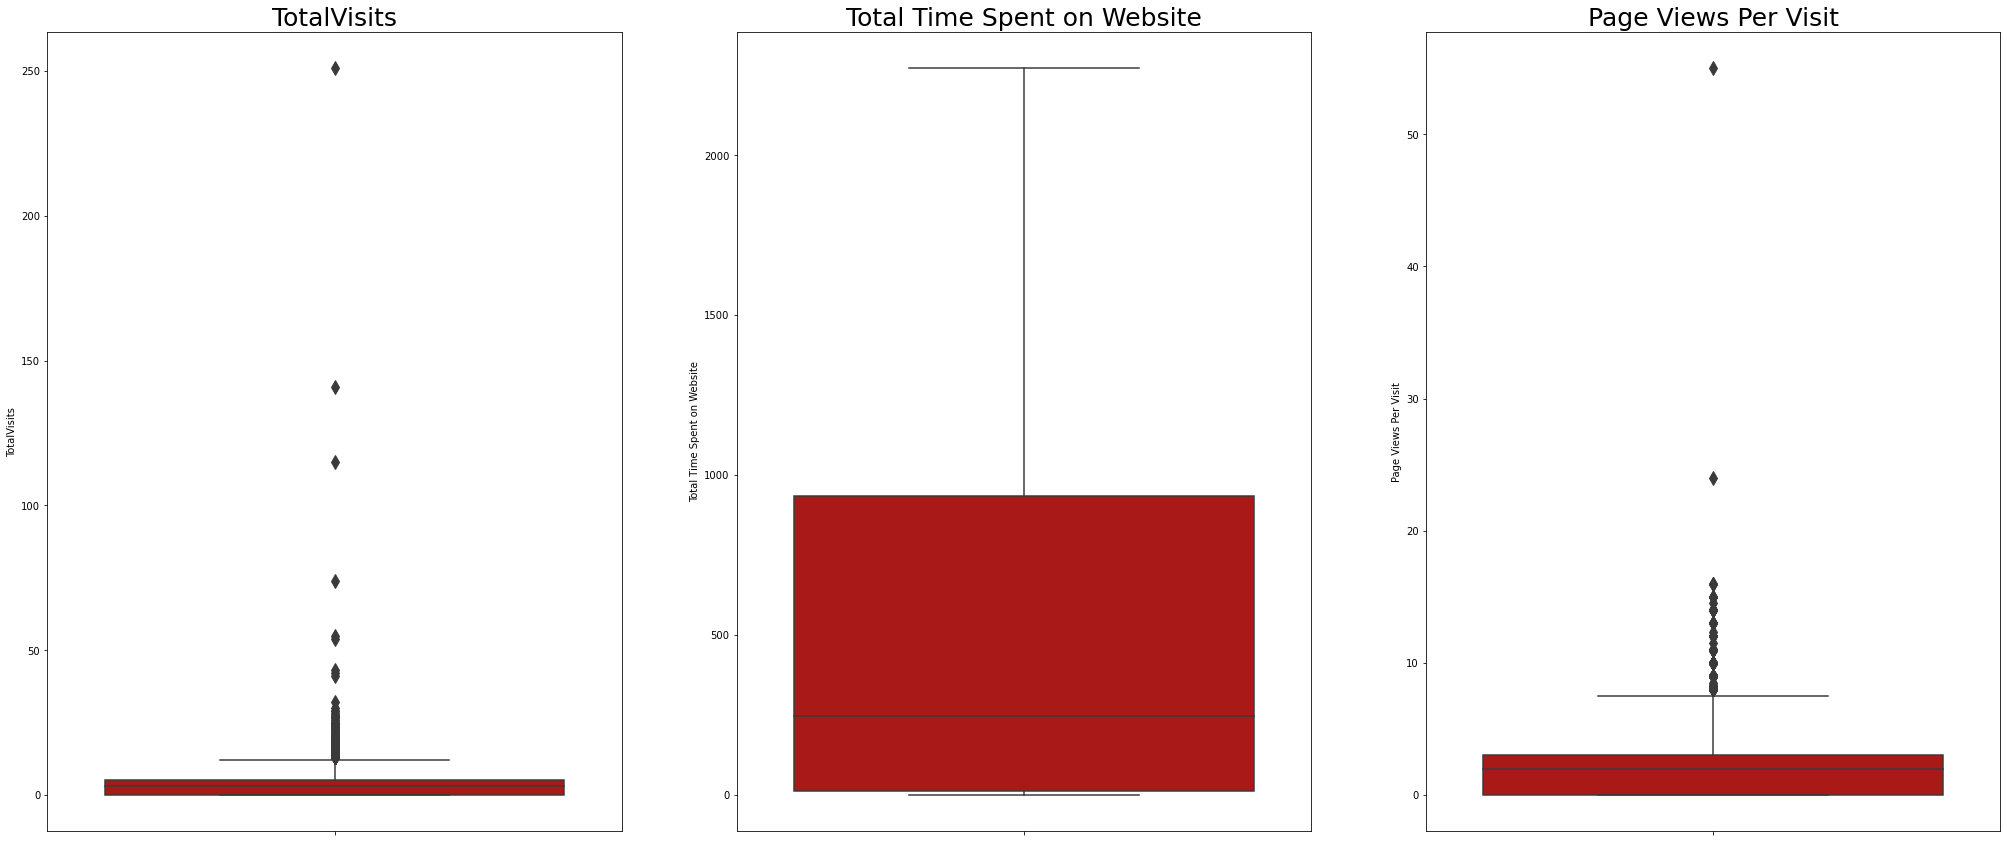

In [31]:
plt.figure(figsize=(35,50))

# Title names for the columns in the dataset

col_title={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col_title[i],fontsize=25)
    sns.boxplot(y=Lead_scoring_df[col_title[i]],data=Lead_scoring_df,palette='gist_heat',fliersize=10)

From the above boxplots we can now confirm that we have two outlier variables in our dataset ('TotalVisits' and 'Page Views Per Visit'). Now as per business requirement we cannot drop these outliers because it may impact our analysis/model so we will create bins for these two outliers

In [32]:
# For 'TotalVisits' variable

# As we have range from 0 to 251 for'TotalVisits' variable

ranges_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits.keys()))):
    Lead_scoring_df[list(ranges_total_visits.keys())[i]]=Lead_scoring_df['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)

In [33]:
# For 'Page Views Per Visit' variable

# As we have range from 0 to 55 for'Page Views Per Visit' variable

ranges_total_visits_1={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits_1.keys()))):
    Lead_scoring_df[list(ranges_total_visits_1.keys())[i]]=Lead_scoring_df['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] and x >= (list(ranges_total_visits_1.values())[i] - 10)) else 0)

In [34]:
redundant=['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']

Lead_scoring_df=Lead_scoring_df.drop(redundant,axis=1)

Lead_scoring_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,Search,...,A free copy of Mastering The Interview,Last Notable Activity,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,API,Olark Chat,0,0,0,0,Page Visited on Website,Missing,Unemployed,0,...,0,Modified,1,0,0,0,1,0,0,0
1,API,Organic Search,0,0,0,674,Email Opened,Missing,Unemployed,0,...,0,Email Opened,1,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,1532,Email Opened,Business Administration,Student,0,...,1,Email Opened,1,0,0,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,305,Unreachable,Media and Advertising,Unemployed,0,...,0,Modified,1,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,0,1,1428,Converted to Lead,Missing,Unemployed,0,...,0,Modified,1,0,0,0,1,0,0,0


After creating bins we removed the outliers and are now good to go. Before creating the dummy variables let's remove redundant columns/varaibles.

Also from above we know columns : 'Last Activity', 'Tags', 'Last Notable Activity' activity columns came from sales team, thus we will drop these redundant columns.

In [35]:
# dropping redundant column

redundant=['Last Activity', 'Tags', 'Last Notable Activity']

Lead_scoring_df=Lead_scoring_df.drop(redundant,axis=1)

Lead_scoring_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Specialization,What is your current occupation,Search,Newspaper Article,...,Through Recommendations,A free copy of Mastering The Interview,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,API,Olark Chat,0,0,0,0,Missing,Unemployed,0,0,...,0,0,1,0,0,0,1,0,0,0
1,API,Organic Search,0,0,0,674,Missing,Unemployed,0,0,...,0,0,1,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,1532,Business Administration,Student,0,0,...,0,1,1,0,0,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,305,Media and Advertising,Unemployed,0,0,...,0,0,1,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,0,1,1428,Missing,Unemployed,0,0,...,0,0,1,0,0,0,1,0,0,0


### Exploratory Data Analysis


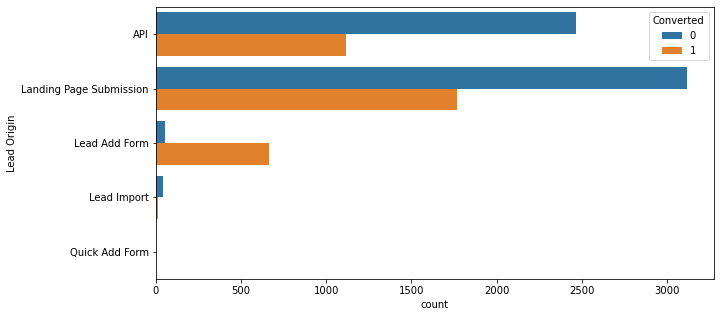

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(y="Lead Origin", hue="Converted", data=Lead_scoring_df)
plt.show()

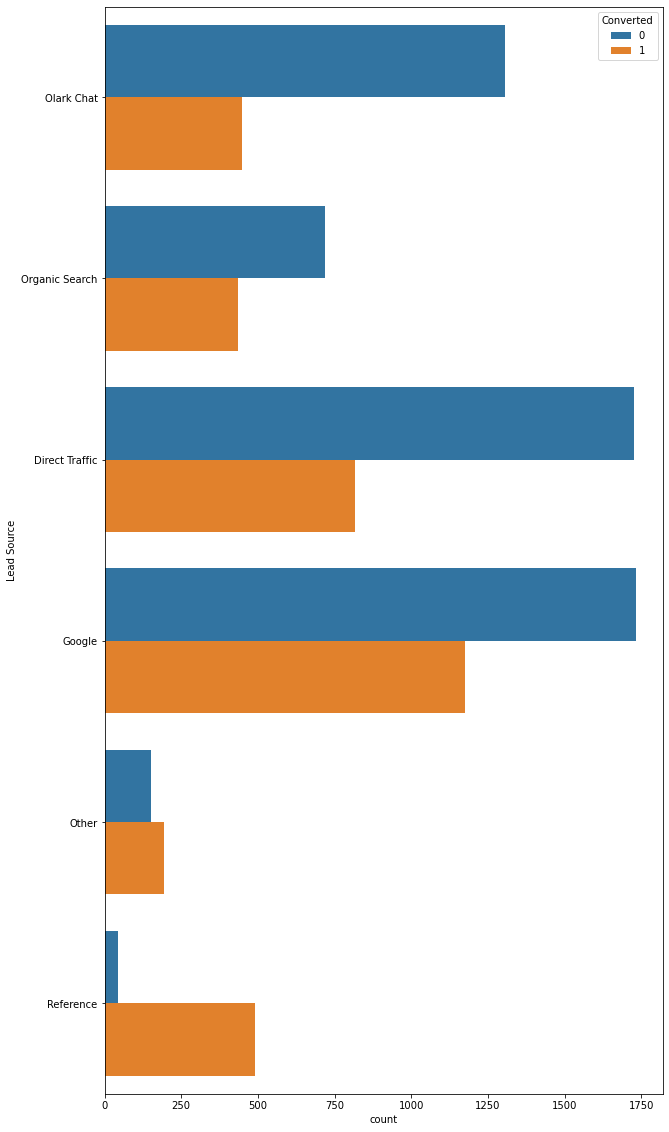

In [37]:
plt.figure(figsize=(10, 20))
sns.countplot(y="Lead Source", hue="Converted", data=Lead_scoring_df)
plt.show()

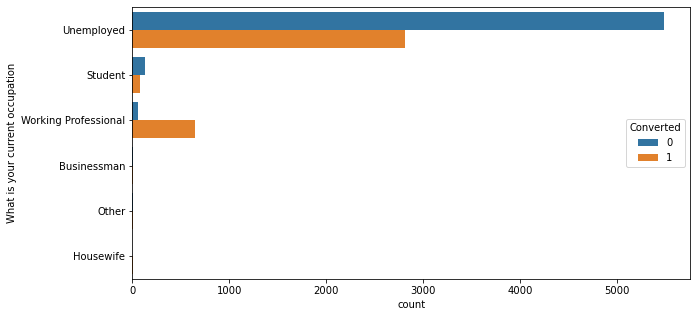

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(y="What is your current occupation", hue="Converted", data=Lead_scoring_df)
plt.show()

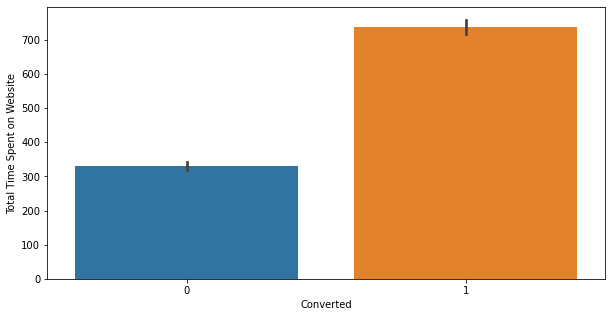

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Converted', y = 'Total Time Spent on Website',data = Lead_scoring_df)
plt.show()

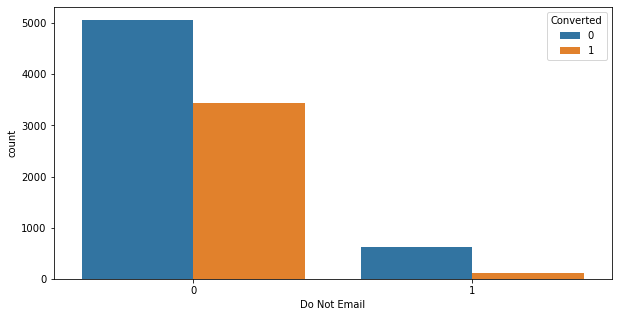

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Do Not Email", hue="Converted", data=Lead_scoring_df)
plt.show()

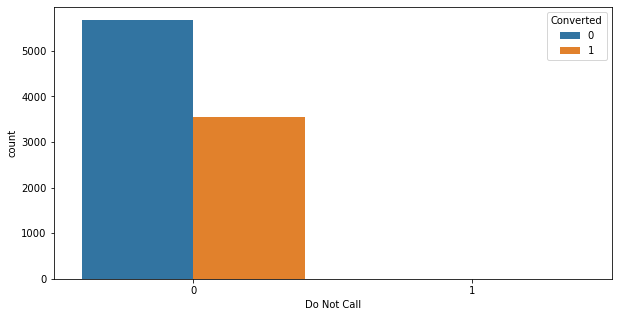

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Do Not Call", hue="Converted", data=Lead_scoring_df)
plt.show()

#### Observations from EDA Process -
 - Maximum lead conversion happened from Landing Page Submission.
 - Major lead conversion in the lead source is from 'Google'
 - Major lead conversion is from the Unemployed Group
 - Major lead conversion from Total Time Spent on Website
 - Major conversion has happened from the emails that have been sent


#### Creating Dummy Variables

In [42]:
#Creating a dummy variables for 4 categories and dropping the first level. 

cat = ['Lead Origin', 'Lead Source','Specialization','What is your current occupation']

#creating dummy variables data set
dummy = pd.get_dummies(Lead_scoring_df[cat], drop_first=True)

# Adding these dummies to our original dataset
Lead_scoring_df = pd.concat([Lead_scoring_df,dummy],axis=1)

#dropping the duplicate columns
Lead_scoring_df = Lead_scoring_df.drop(cat, axis=1)

#viewing the dataset
Lead_scoring_df.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
Lead_scoring_df.shape

(9240, 51)

In [44]:
Lead_scoring_df.describe()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,487.698268,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,...,0.010823,0.007900,0.004329,0.037771,0.021970,0.001082,0.001732,0.022727,0.897186,0.076407
std,0.270435,0.014711,0.486714,548.021466,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,...,0.103472,0.088537,0.065656,0.190651,0.146592,0.032882,0.041579,0.149041,0.303732,0.265662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,248.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,936.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,2272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Normalising continuous features

In [45]:
normalized_df=(Lead_scoring_df['Total Time Spent on Website']-Lead_scoring_df['Total Time Spent on Website'].max())/(Lead_scoring_df['Total Time Spent on Website'].min()-Lead_scoring_df['Total Time Spent on Website'].max())
Lead_scoring_df = Lead_scoring_df.drop(['Total Time Spent on Website'], 1)
Lead_scoring_df = pd.concat([Lead_scoring_df,normalized_df],axis=1)
Lead_scoring_df.head()

,Do Not Email,Do Not Call,Converted,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Total Time Spent on Website
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.000000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.703345
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0.325704
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.865757
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.371479


## Model Building
Let's start by splitting our data into a training set and a test set.

In [46]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = Lead_scoring_df.drop(['Converted'],axis=1)

# Putting response variable to y
y = Lead_scoring_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [47]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=51)

### Correlation Matrix

<AxesSubplot:>

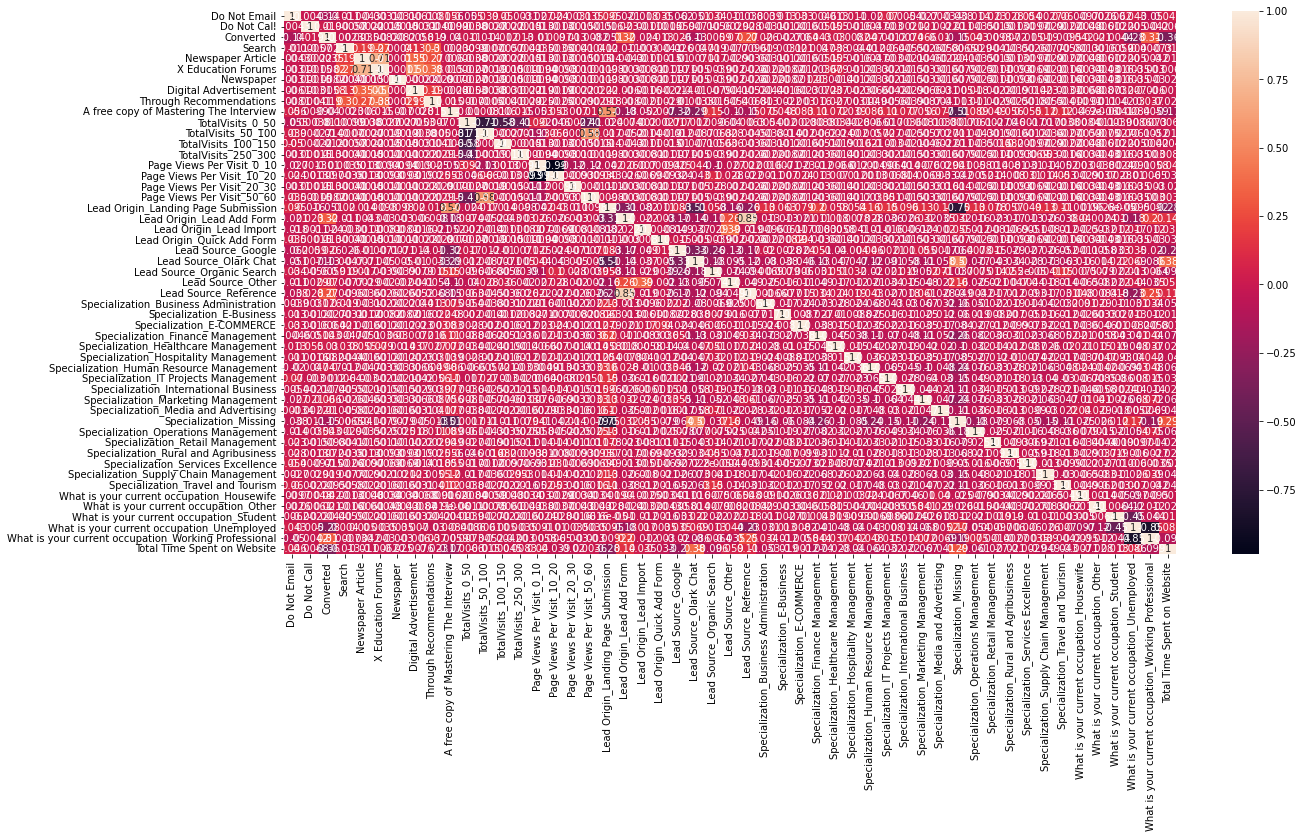

In [48]:
plt.figure(figsize = (20,10))
sns.heatmap(Lead_scoring_df.corr(),annot = True)

we see lot of coorelation is there in df

### PCA on the data


In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(random_state=51)

In [51]:
pca.fit(X_train)

PCA(random_state=51)

Making a scree plot for the explained variance

In [52]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

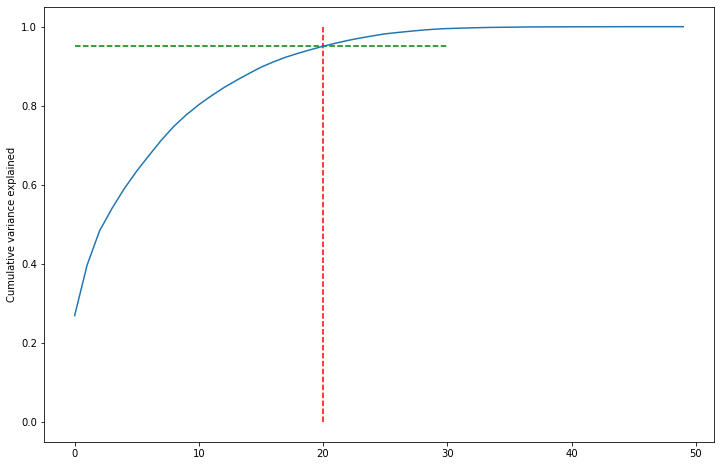

In [53]:
fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.vlines(x=20, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 20 components for which includes 95% of data variance

In [54]:
from sklearn.decomposition import IncrementalPCA

In [55]:
pca_final = IncrementalPCA(n_components=20)

In [56]:
df_train_pca = pca_final.fit_transform(X_train)

In [57]:
df_train_pca.shape

(6468, 20)

In [58]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [59]:
corrmat.shape

(20, 20)

#### Plotting the heatmap of the corr matrix

<AxesSubplot:>

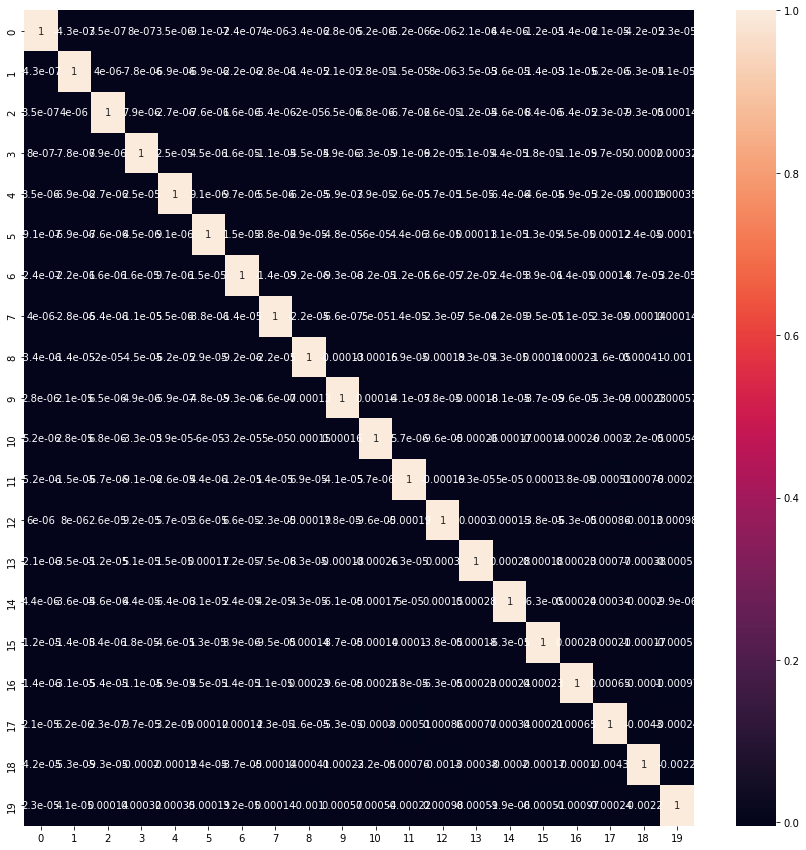

In [60]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [61]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2772, 20)

### Applying logistic regression on the data on our Principal components


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [63]:
learner_pca = LogisticRegression()

In [64]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Making predictions on the test set

In [65]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]

In [66]:
pred_probs_test

array([0.67123312, 0.76832954, 0.41432273, ..., 0.2000577 , 0.46122542,
       0.09388255])

In [67]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.84'

In [68]:
y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':pred_probs_test,'ID':y_test.index})

In [69]:
y_test_pred_final.head()

,Converted,Converted_Probability,ID
0,0,0.671233,979
1,1,0.768330,7039
2,0,0.414323,3864
3,1,0.648865,2746
4,0,0.232230,7384


### ROC Curve Plotting

In [70]:
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score


def edu_roc( real, probability ):
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    auc_score = roc_auc_score( real, probability )    
    plt.figure(figsize=(8, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return None

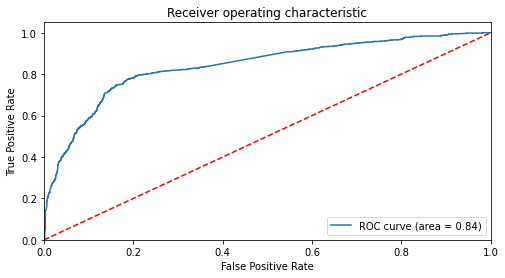

In [71]:
edu_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)

Points to be concluded from above roc curve -

 - The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
 - The area under the curve is 84% of the total area.

### Model Evaluation

Finding Optimal Cutoff Point


In [72]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Converted_Probability.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

,Converted,Converted_Probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.671233,979,1,1,1,1,1,1,1,0,0,0
1,1,0.768330,7039,1,1,1,1,1,1,1,1,0,0
2,0,0.414323,3864,1,1,1,1,1,0,0,0,0,0
3,1,0.648865,2746,1,1,1,1,1,1,1,0,0,0
4,0,0.232230,7384,1,1,1,0,0,0,0,0,0,0


In [73]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385281  1.000000  0.000000
0.1   0.1  0.440115  0.993446  0.093310
0.2   0.2  0.631313  0.907303  0.458333
0.3   0.3  0.794012  0.779963  0.802817
0.4   0.4  0.803752  0.729401  0.850352
0.5   0.5  0.783550  0.626404  0.882042
0.6   0.6  0.774170  0.539326  0.921362
0.7   0.7  0.748918  0.426030  0.951291
0.8   0.8  0.717893  0.309925  0.973592
0.9   0.9  0.693001  0.218165  0.990610


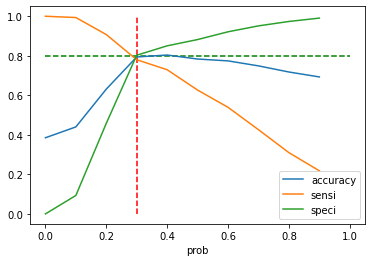

In [74]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.8, xmax=1, xmin=0, colors="g", linestyles="--")
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [75]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset
y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 ) 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
0,0,0.671233,979,1,1,1,1,1,1,1,0,0,0,1
1,1,0.768330,7039,1,1,1,1,1,1,1,1,0,0,1
2,0,0.414323,3864,1,1,1,1,1,0,0,0,0,0,1
3,1,0.648865,2746,1,1,1,1,1,1,1,0,0,0,1
4,0,0.232230,7384,1,1,1,0,0,0,0,0,0,0,0


In [76]:
print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))  

Accuracy score in predicting test dataset : 0.7940115440115441
Precision score in predicting test dataset: 0.7125748502994012
Recall score in predicting test dataset: 0.7799625468164794


## Lead Score assigning

In [77]:
# Creating new columns for lead number and lead score
# Dropping unwanted columns
L = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y_test_pred_final=y_test_pred_final.drop(L,1)
y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))


y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Score
0,0,0.671233,979,1,67
1,1,0.768330,7039,1,77
2,0,0.414323,3864,1,41
3,1,0.648865,2746,1,65
4,0,0.232230,7384,0,23


## Conclusion
#### Valuable Insights -
 - The Sensitivity and Specificity, Accuracy, Precision and Recall score we got from test set are almost accurate.
 - We have high recall score than precision score which is a sign of good model.
 - In business terms, this model has an ability to adjust with the company’s requirements in coming future.
 - This concludes that the model is in stable state.
 - Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
    - **Lead Origin_Lead Add Form**
    - **Total Time Spent on Website**
    - **What is your current occupation_Working Professional**